In [2]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import numpy as np

from csv_setup import *

In [3]:
bike_sharing_df = get_bike_sharing_df_clean()
bike_sharing_df.head(3)

,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,fall,winter
0,1,0,0,6,0,1,0.2879,0.81,0.0,16,1,0,0,0
1,1,1,0,6,0,1,0.2727,0.80,0.0,40,1,0,0,0
2,1,2,0,6,0,1,0.2727,0.80,0.0,32,1,0,0,0


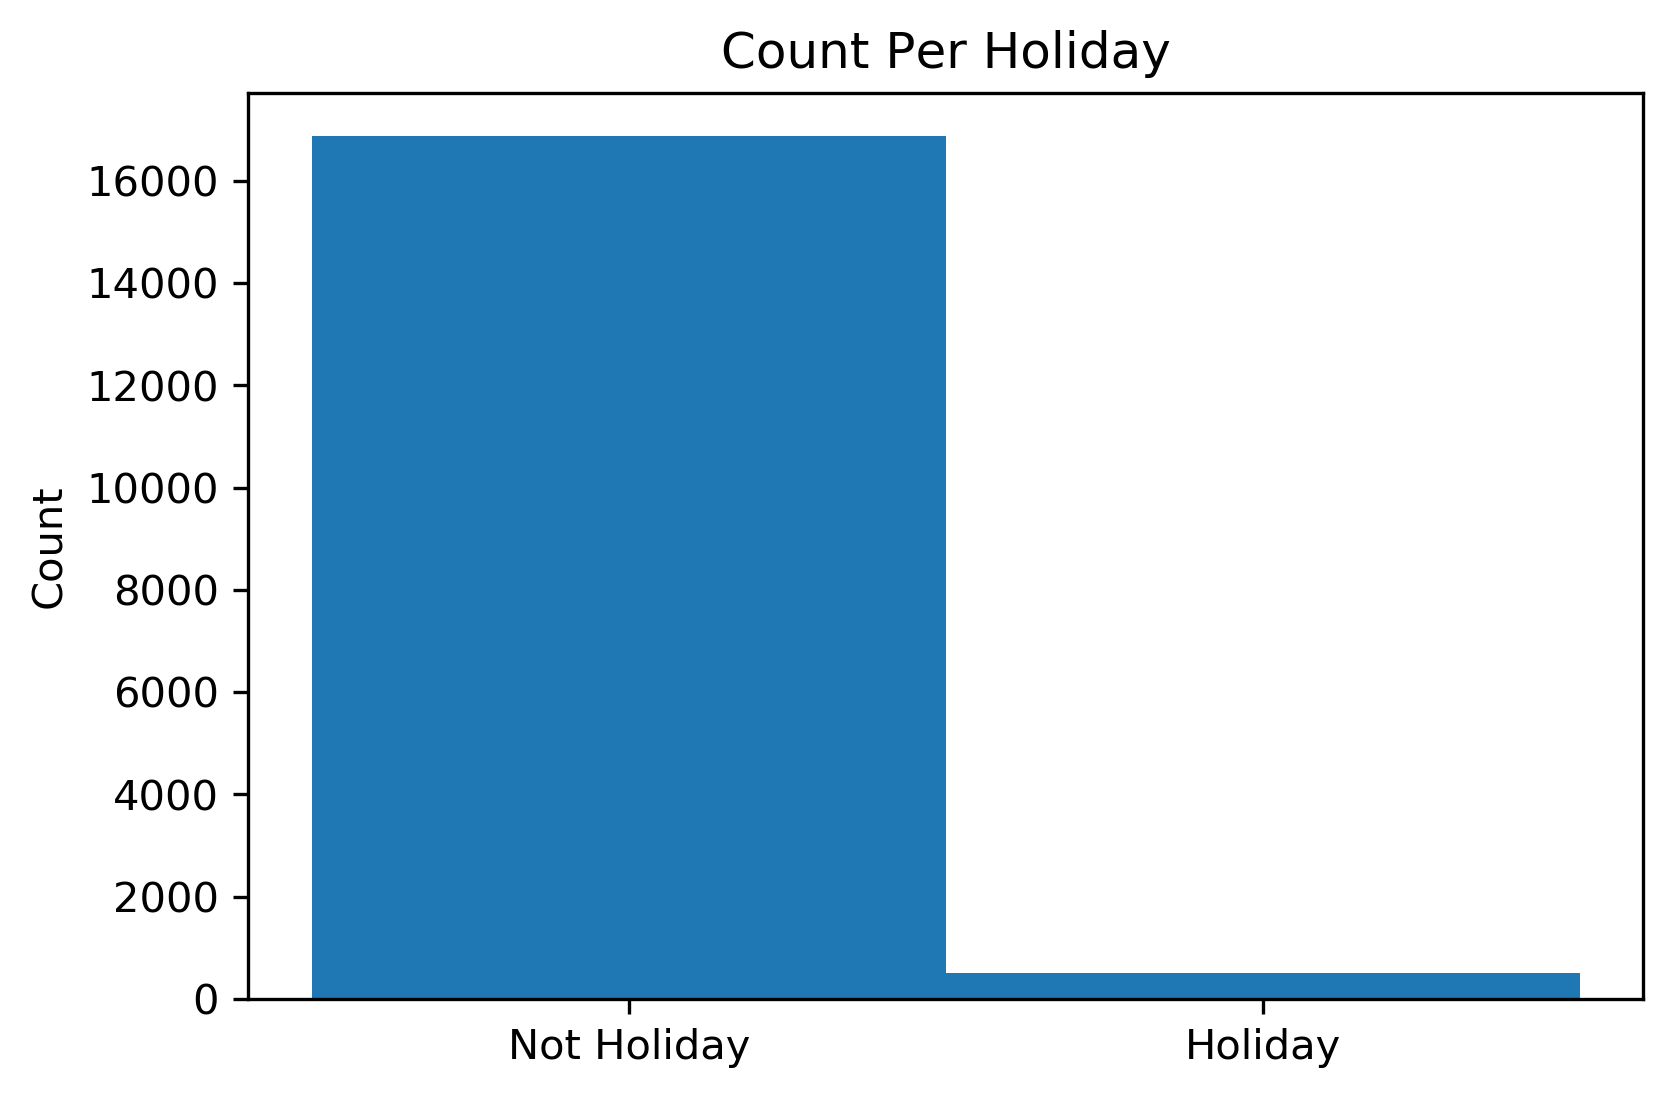

In [61]:
plt.hist(bike_sharing_df.holiday, bins=[-.5,.5,1.5])
plt.xticks([0,1], ['Not Holiday', 'Holiday'])
#set_xticklabels(('Not Holiday', 'Holiday'))

plt.title("Count Per Holiday")
plt.ylabel('Count')

plt.show()

cnt    223
Name: 4, dtype: int64


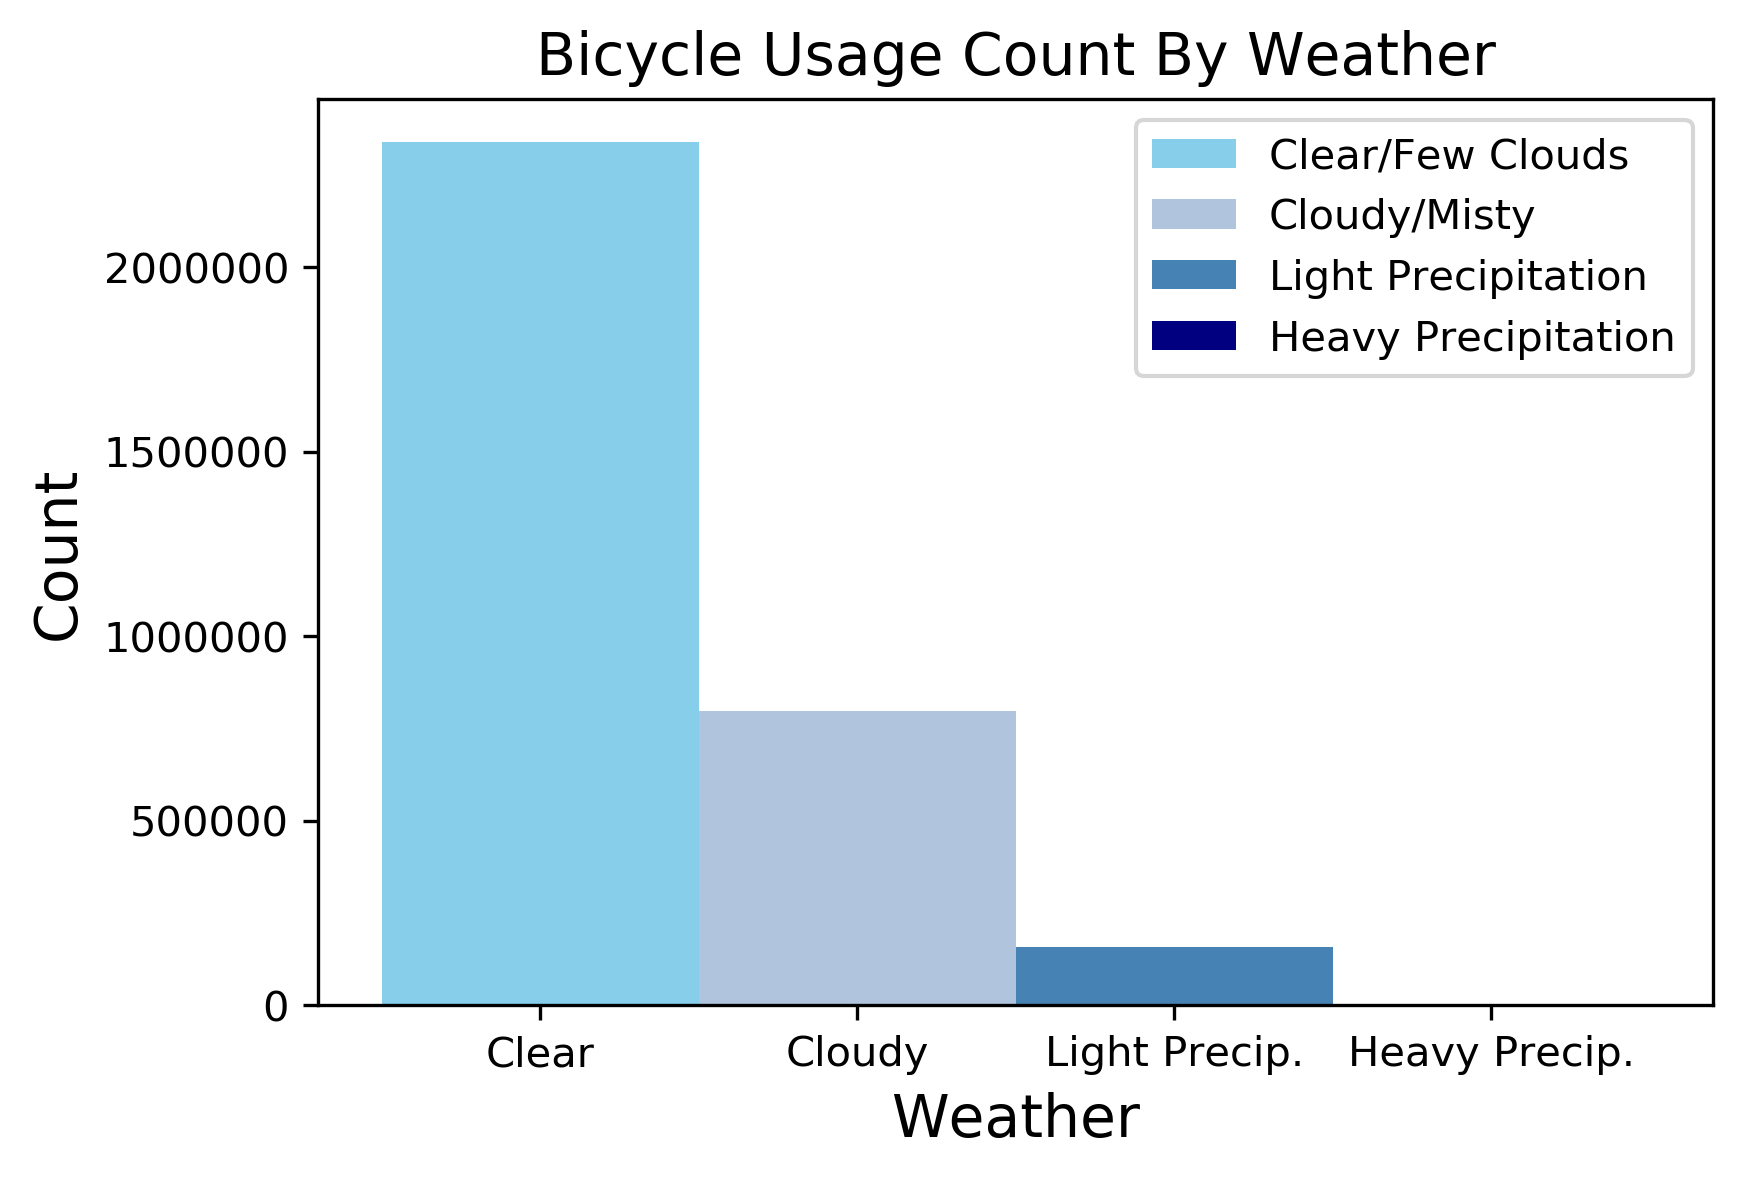

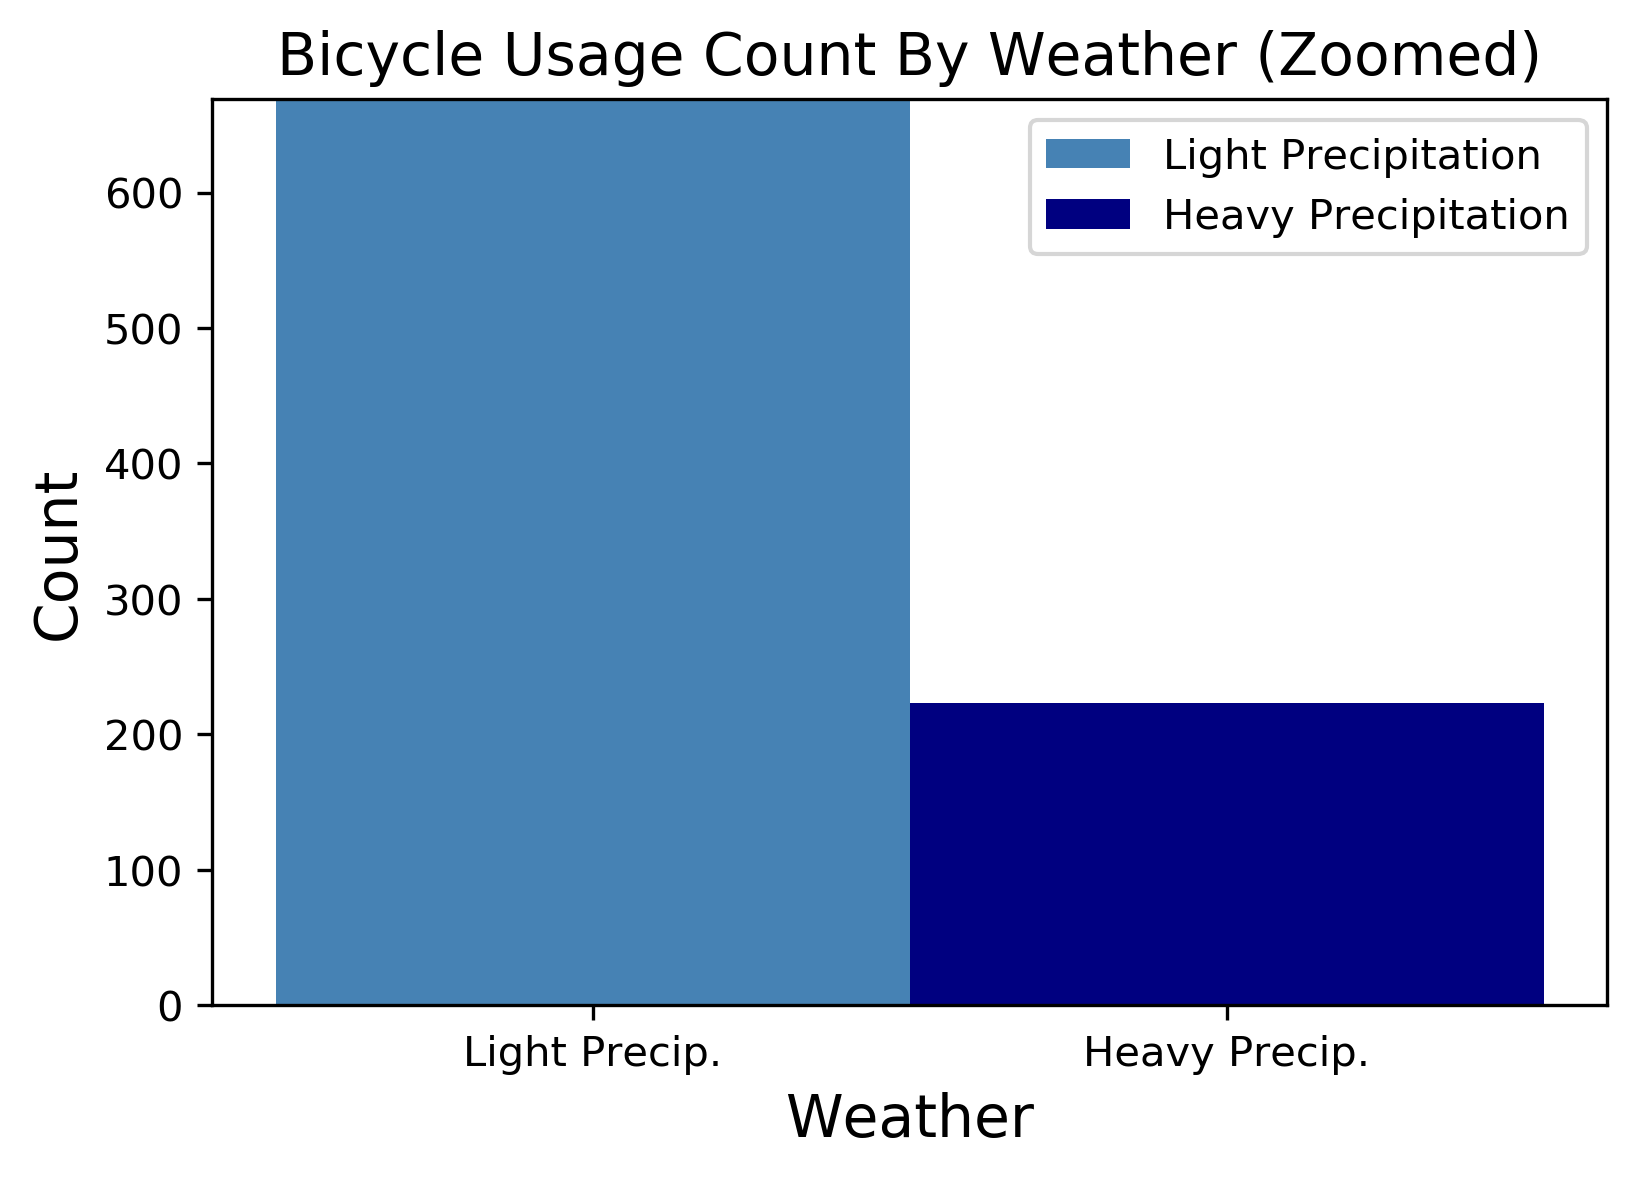

In [105]:
# Groupby weather and sum
weather_df = bike_sharing_df[['weathersit', 'cnt']]
weather_gk = weather_df.groupby('weathersit')
weather_XY = weather_gk.sum()

# Graph histogram for each weather type
labels = ['Clear/Few Clouds', 'Cloudy/Misty', 'Light Precipitation', 'Heavy Precipitation']
colors = ['skyblue', 'lightsteelblue', 'steelblue', 'navy']
for i in weather_XY.index.values.tolist():
    plt.hist(i, bins=[-.5 + i,.5 + i], weights=weather_XY.loc[i], color=colors[i-1], label=labels[i-1])
    
# Graph beautification
# Labels
plt.title("Bicycle Usage Count By Weather", fontsize=14)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Count', fontsize=14)
tickLabels = ['Clear', 'Cloudy', 'Light Precip.', 'Heavy Precip.']
plt.xticks([1, 2, 3, 4], tickLabels)

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

# Second histogram to show values for Heavy Precip.
for i in range(3,5):
    plt.hist(i, bins=[-.5 + i,.5 + i], weights=weather_XY.loc[i], color=colors[i-1], label=labels[i-1])
    
# Graph beautification
# Labels
plt.title("Bicycle Usage Count By Weather (Zoomed)", fontsize=14)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(3,5), [tickLabels[2], tickLabels[3]])
plt.ylim([0, weather_XY.loc[4].cnt * 3])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

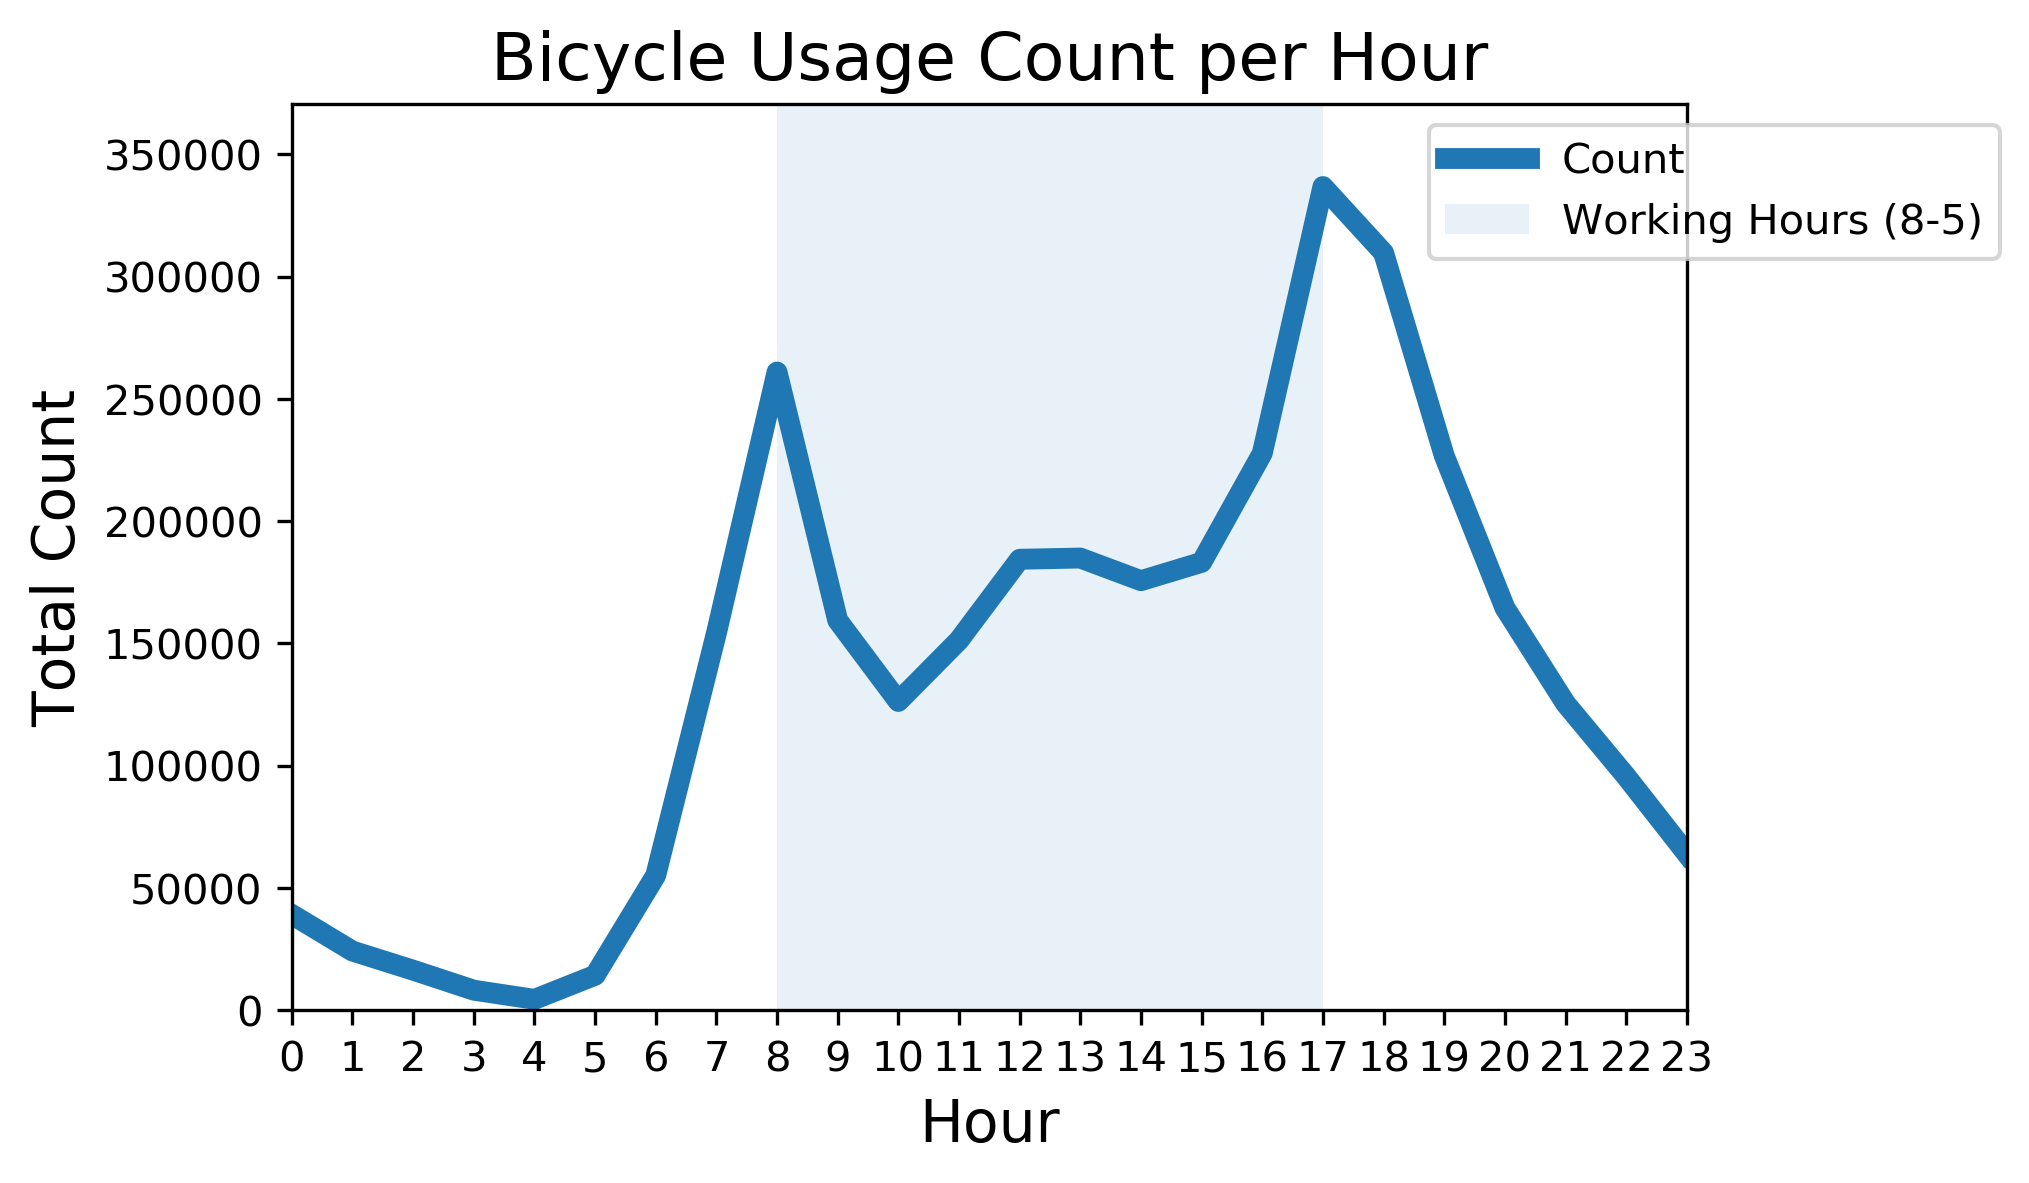

In [122]:
# Sum for each hour
hour_df = bike_sharing_df[['hr','cnt']]
hour_gk = hour_df.groupby('hr')
hour_XY = hour_gk.sum()

# Plot change in count over hour
plt.plot(hour_XY.index.values.tolist(), hour_XY.cnt, lw=5, label='Count')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(hour_XY.cnt) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(hour_XY.cnt) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0.8, 1.0))

plt.show()

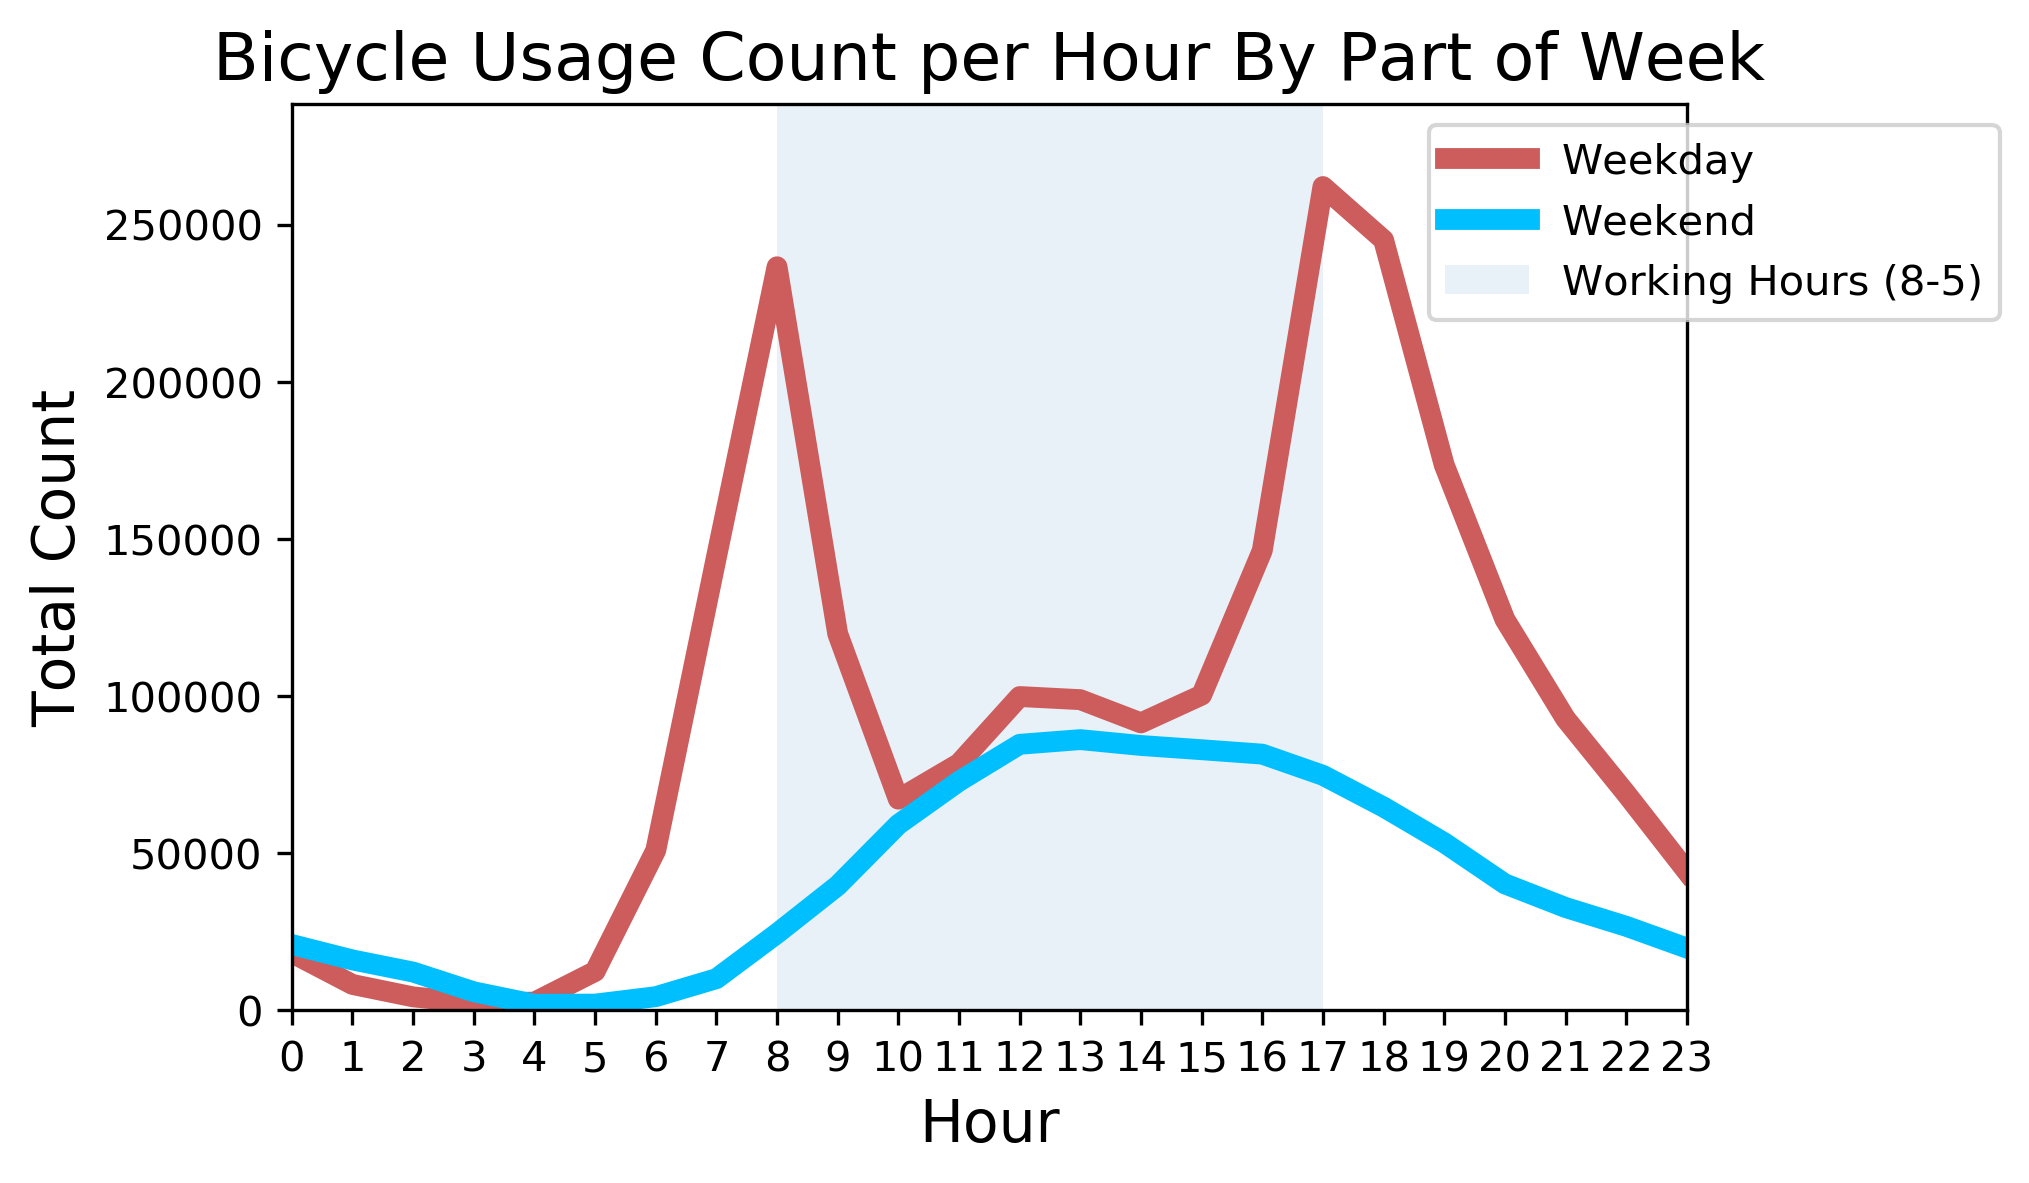

In [123]:
# Split up df into weekday and weekend
weekday_df = bike_sharing_df.loc[bike_sharing_df['workingday'] == 1]
weekend_df = bike_sharing_df.loc[bike_sharing_df['workingday'] == 0]

# Groupby hr
weekday_gk = weekday_df[['hr', 'cnt']].groupby('hr')
weekend_gk = weekend_df[['hr', 'cnt']].groupby('hr')

# Sums for each hour
weekday_XY = weekday_gk.sum()
weekend_XY = weekend_gk.sum()
X = weekday_XY.index.values.tolist()
weekday_Y = weekday_XY.cnt
weekend_Y = weekend_XY.cnt

# Plot change in count over hour for both weekdays and weekends
plt.plot(X, weekday_Y, color='indianred', lw=5, label='Weekday')
plt.plot(X, weekend_Y, color='deepskyblue', lw=5, label='Weekend')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(weekday_Y) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour By Part of Week', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(weekday_Y) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0.8, 1.0))

plt.show()

Index(['cnt'], dtype='object')


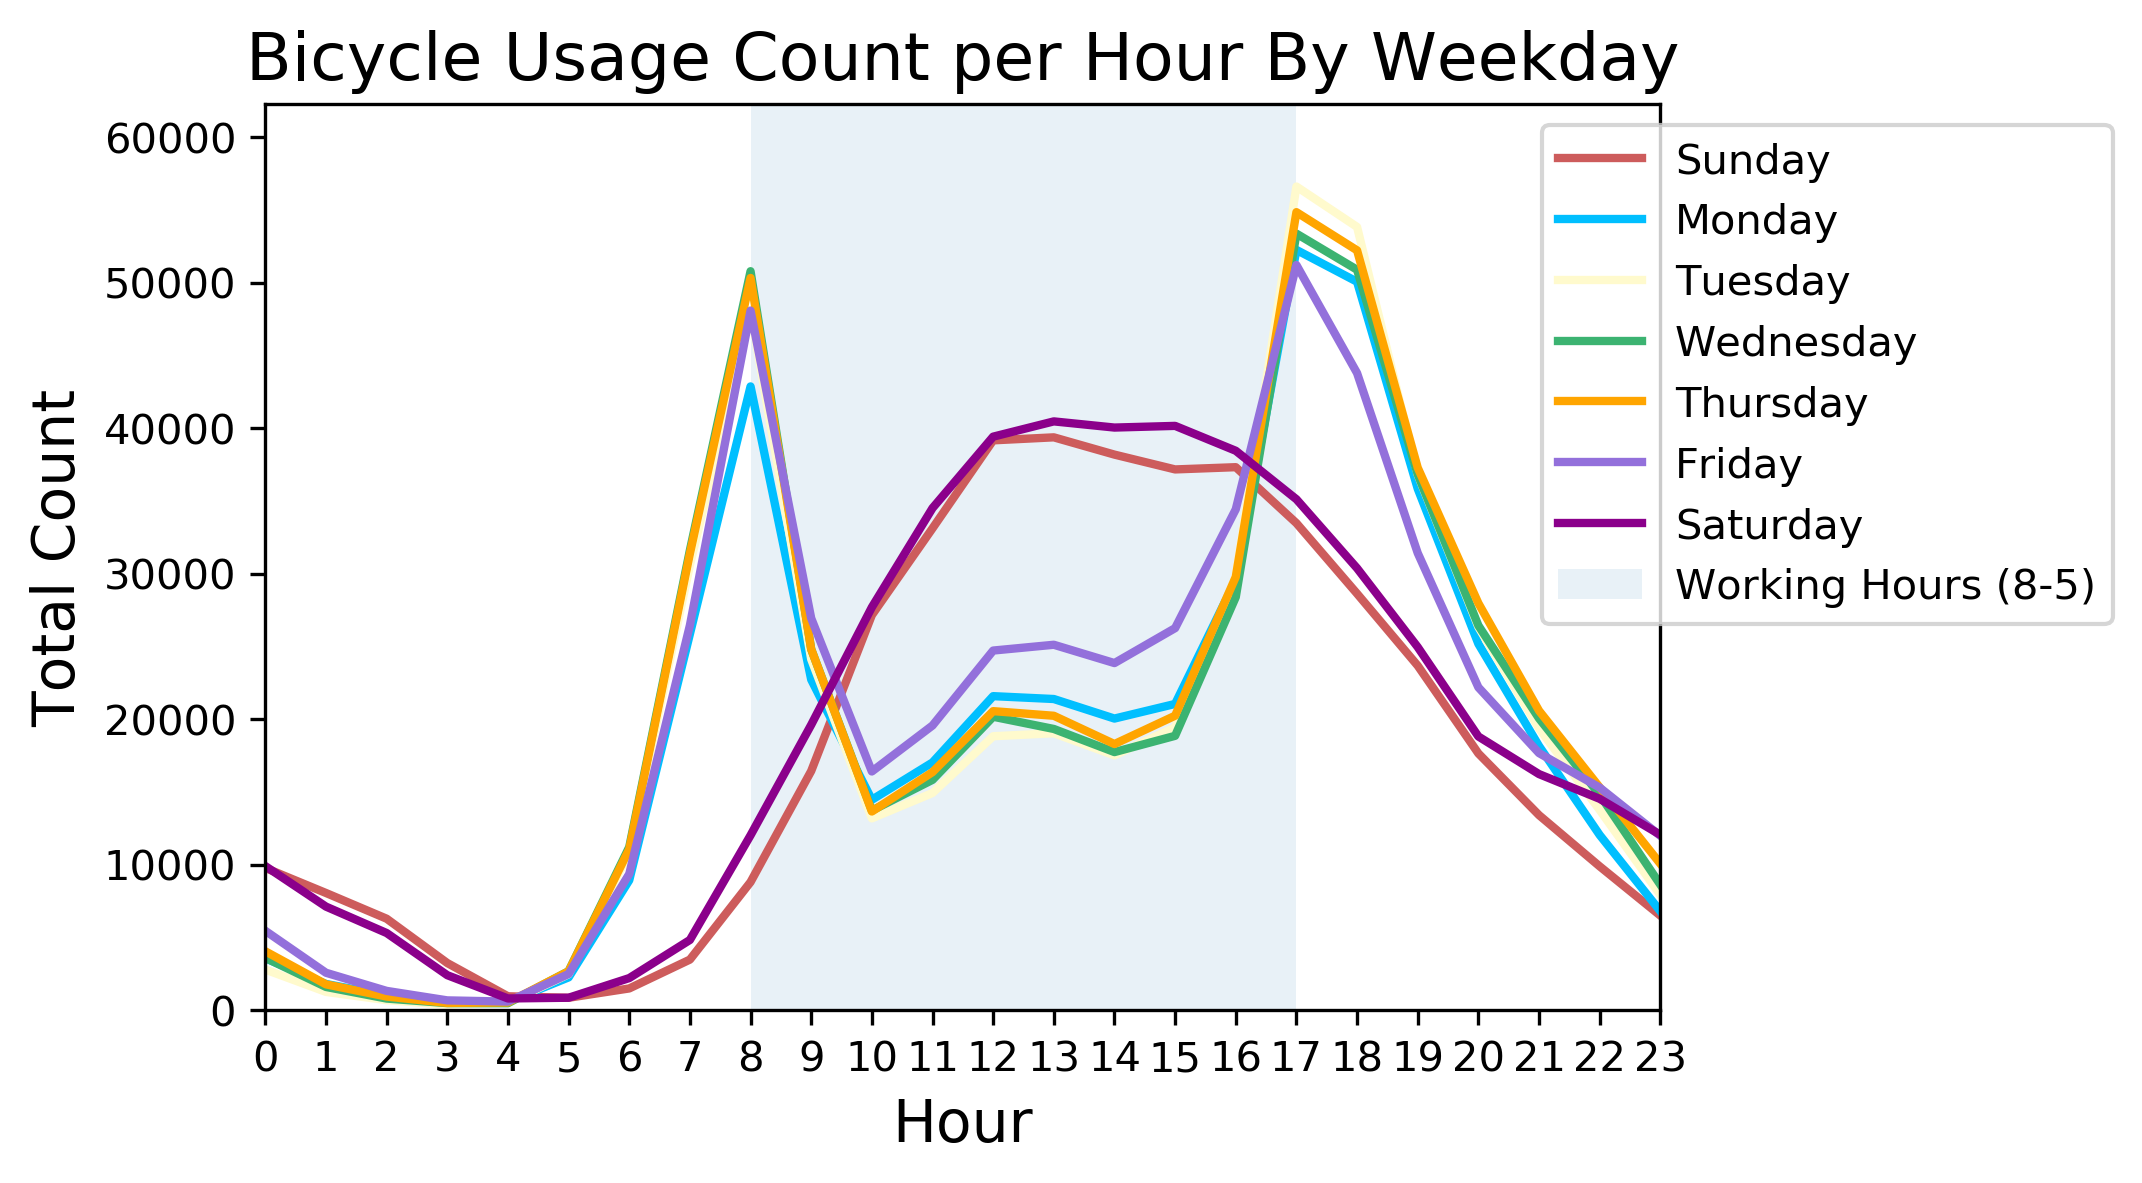

In [124]:
# Groupby hr
daysOfWeek_gk = bike_sharing_df[['hr', 'weekday', 'cnt']].groupby(['weekday', 'hr'])

# Sums for each hour
daysOfWeek_XY = daysOfWeek_gk.sum()
print(daysOfWeek_XY.columns.get_level_values(0))

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['plum', 'deepskyblue', 'lemonchiffon', 'mediumseagreen', 'orange', 'mediumpurple', 'darkmagenta']

# Plot line for each day of week
for i in range(7):
    daysOfWeek_X = list(range(24))
    daysOfWeek_XY_Y = daysOfWeek_XY.loc[i, :]
    plt.plot(daysOfWeek_X, daysOfWeek_XY_Y, color=colors[i], lw=2, label=days[i])

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(daysOfWeek_XY.cnt) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour By Weekday', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(24))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(daysOfWeek_XY.cnt) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0.9, 1.0))

plt.show()

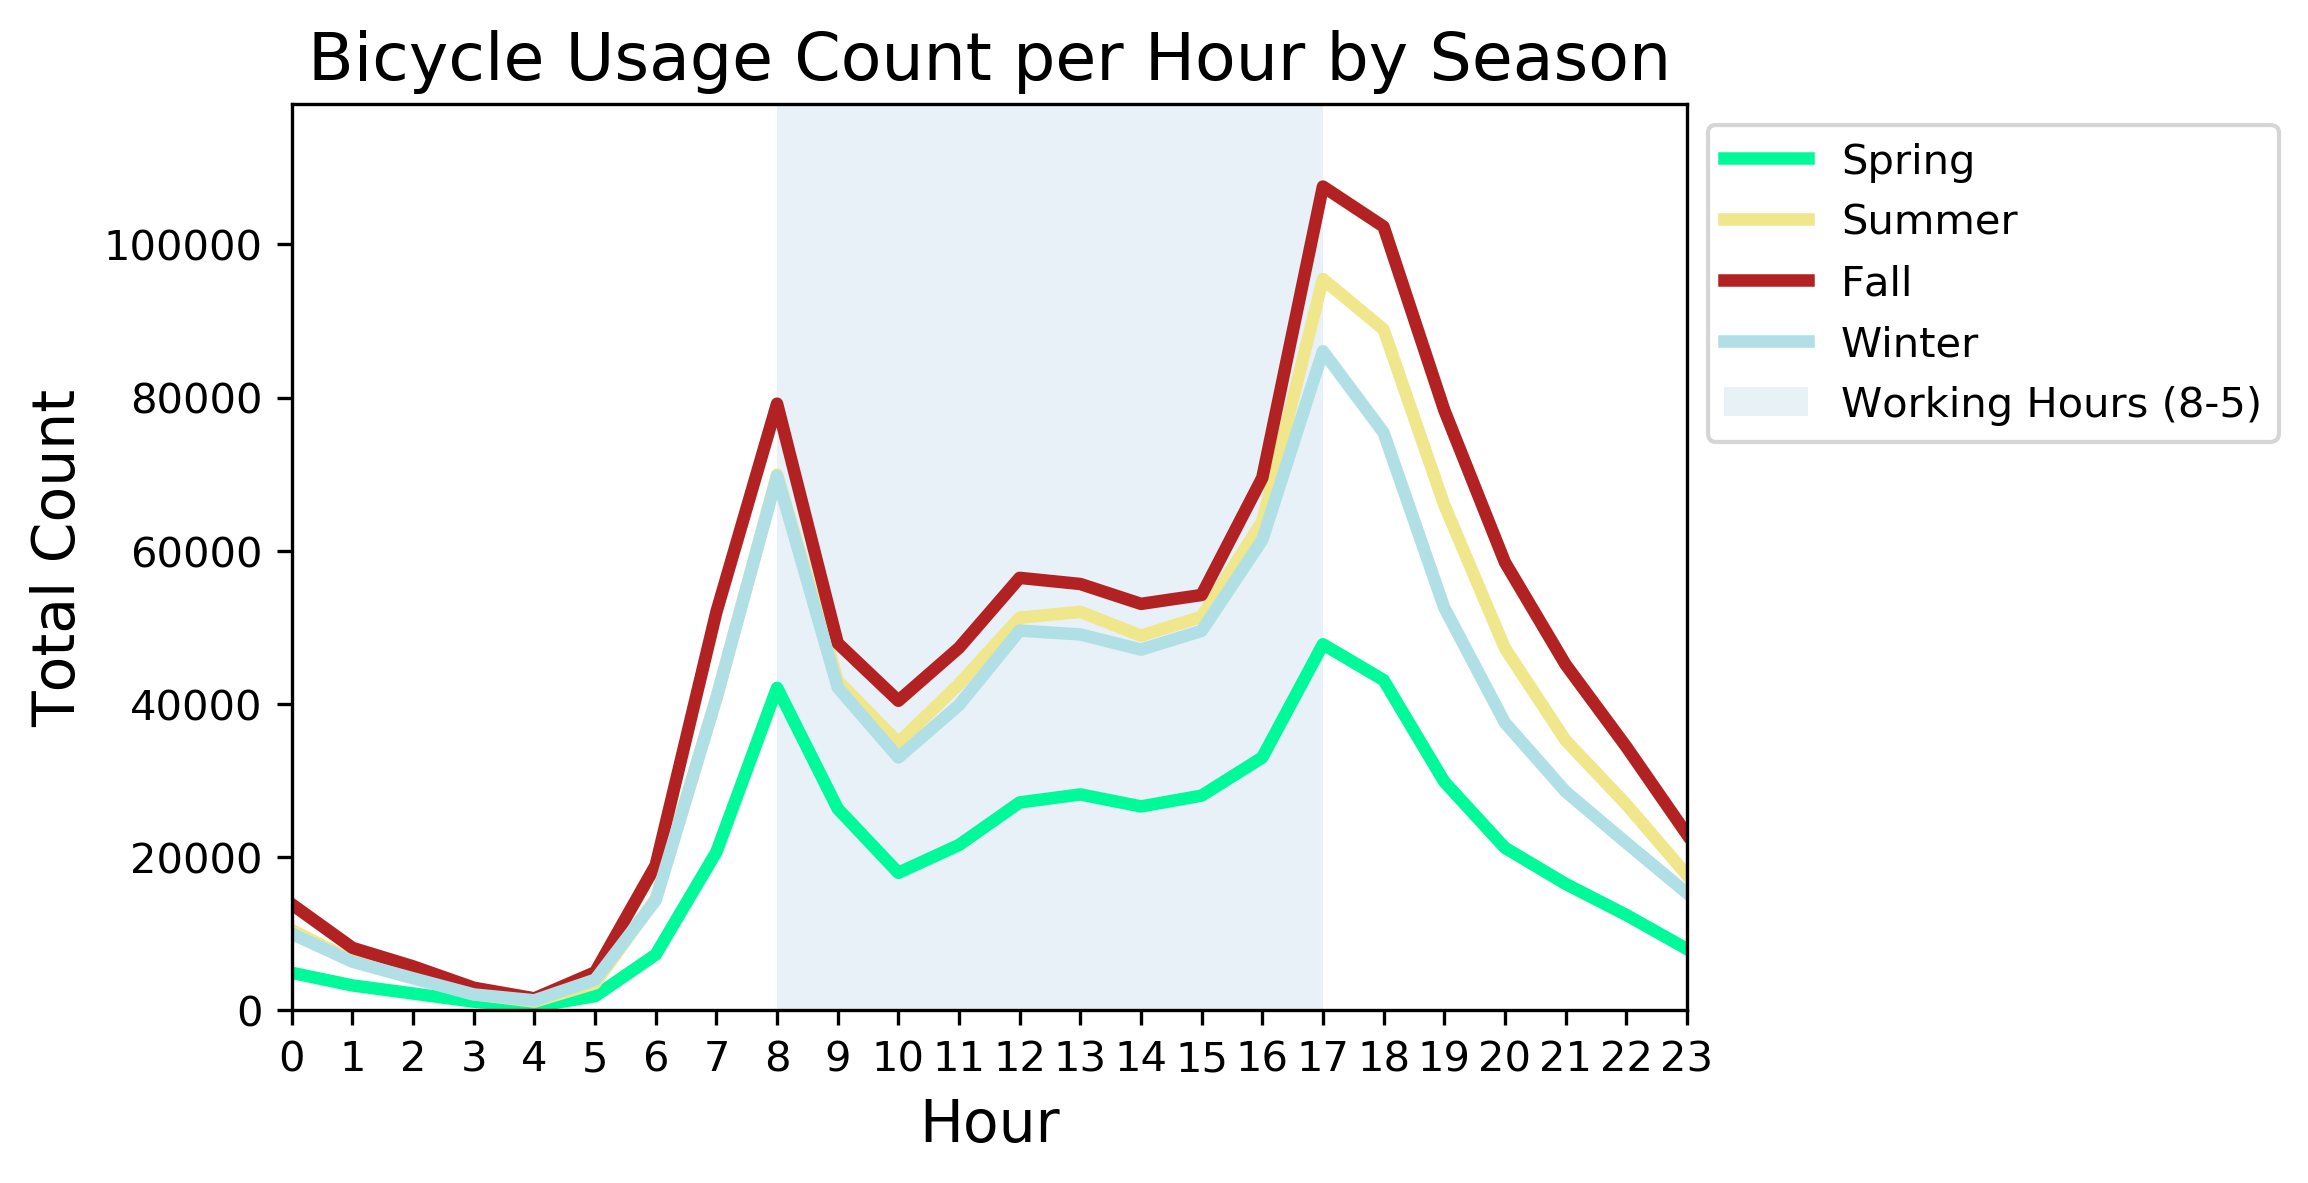

In [118]:
# Split up df into weekday and weekend
season_df = bike_sharing_df[['hr', 'spring', 'summer', 'fall', 'winter', 'cnt']]
spring_df = season_df.loc[bike_sharing_df['spring'] == 1]
summer_df = season_df.loc[bike_sharing_df['summer'] == 1]
fall_df = season_df.loc[bike_sharing_df['fall'] == 1]
winter_df = season_df.loc[bike_sharing_df['winter'] == 1]

# Groupby hr
spring_gk = spring_df[['hr', 'cnt']].groupby('hr')
summer_gk = summer_df[['hr', 'cnt']].groupby('hr')
fall_gk = fall_df[['hr', 'cnt']].groupby('hr')
winter_gk = winter_df[['hr', 'cnt']].groupby('hr')

# Sums for each hour
spring_XY = spring_gk.sum()
summer_XY = summer_gk.sum()
fall_XY = fall_gk.sum()
winter_XY = winter_gk.sum()

# X + Y's
X = spring_XY.index.values.tolist()
spring_Y = spring_XY.cnt
summer_Y = summer_XY.cnt
fall_Y = fall_XY.cnt
winter_Y = winter_XY.cnt

# Plot change in count over hour for both weekdays and weekends for each season
plt.plot(X, spring_Y, color='mediumspringgreen', lw=3, label='Spring')
plt.plot(X, summer_Y, color='khaki', lw=3, label='Summer')
plt.plot(X, fall_Y, color='firebrick', lw=3, label='Fall')
plt.plot(X, winter_Y, color='powderblue', lw=3, label='Winter')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(fall_Y) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour by Season', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(fall_Y) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

['-16.0°C', '-2.8°C', '10.4°C', '23.6°C', '36.8°C', '50.0°C']


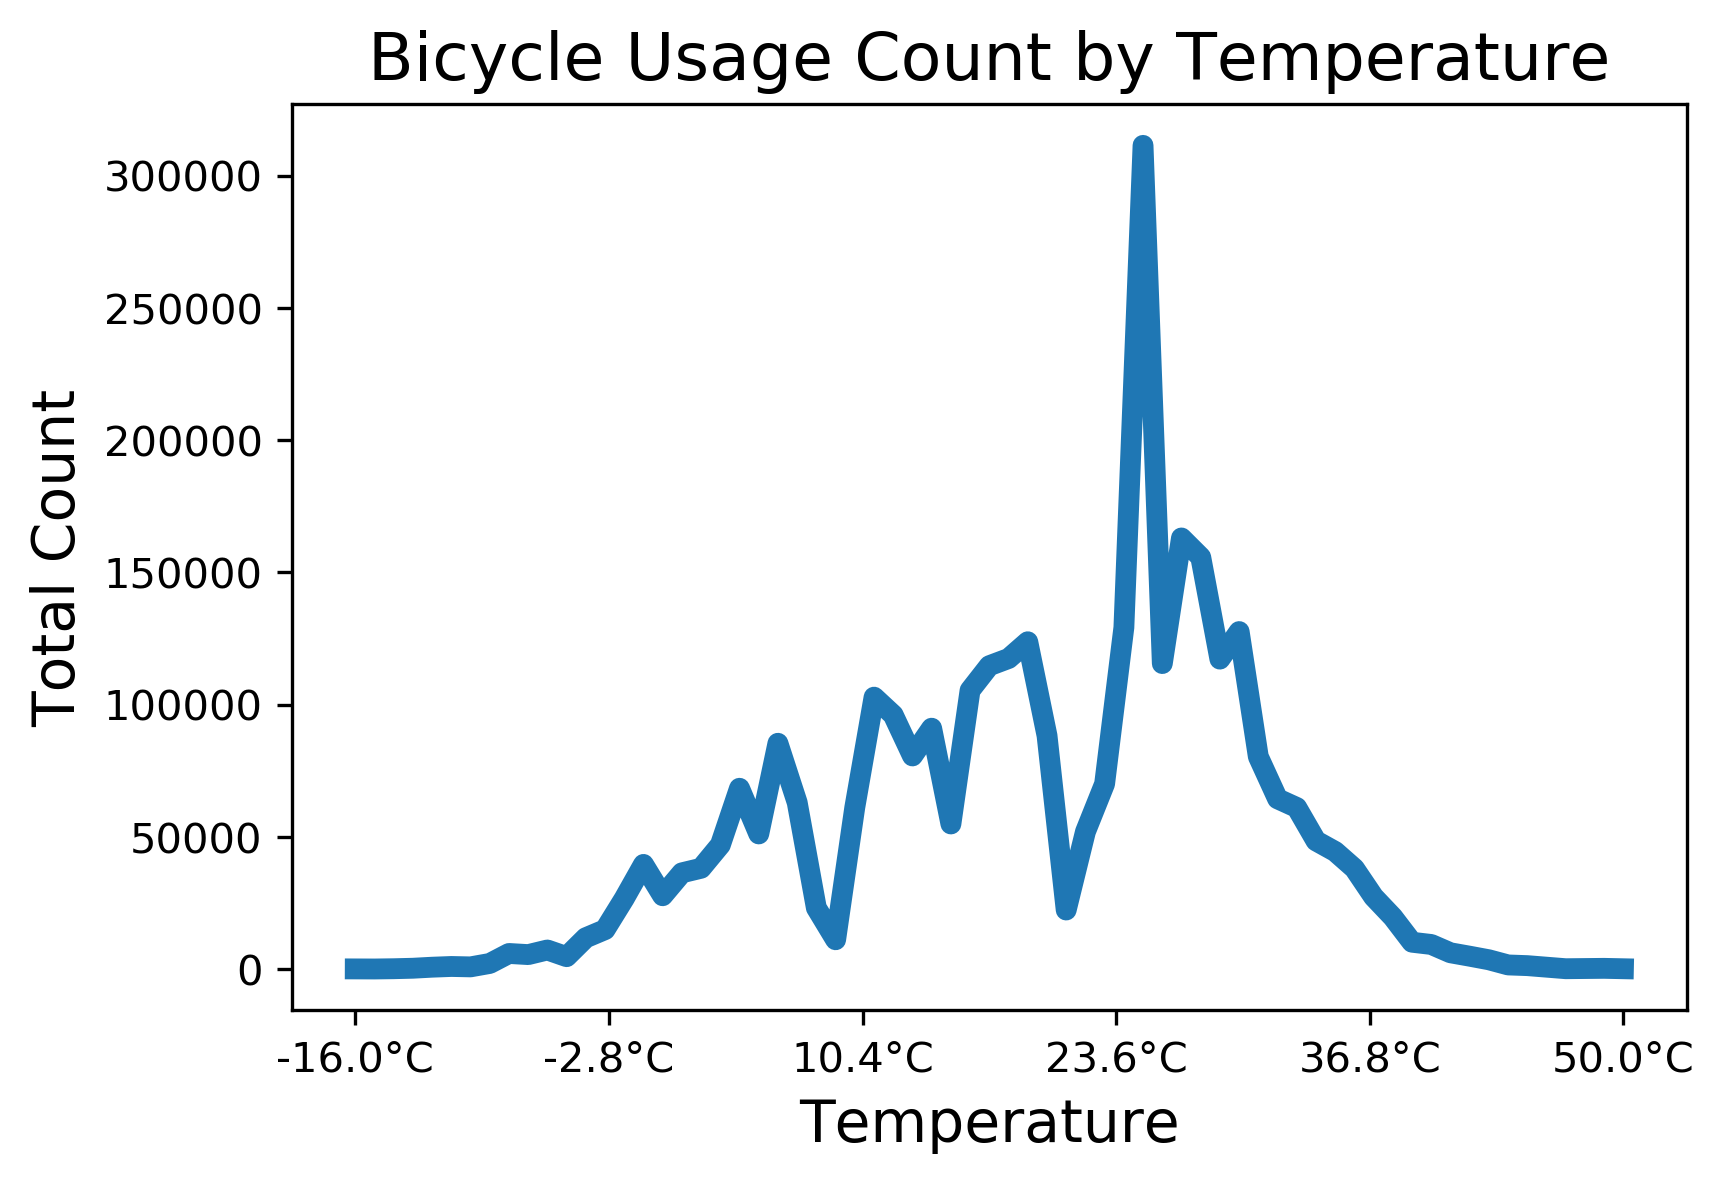

In [146]:
# Sum for each hour
temp_df = bike_sharing_df[['atemp','cnt']]
temp_gk = temp_df.groupby('atemp')
temp_XY = temp_gk.sum()

# Plot change in count over hour
plt.plot(temp_XY.index.values.tolist(), temp_XY.cnt, lw=5, label='Temperature')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count by Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

xTicksNormalized = [round(i * 0.2, 1) for i in range(6)]
xTicks = [str(round((66 * i) - 16, 1)) + '\N{DEGREE SIGN}C' for i in xTicksNormalized]
print(xTicks)
plt.xticks(xTicksNormalized, xTicks)

# Bounding graph values
#plt.xlim([0,23])
#plt.ylim([0,max(hour_XY.cnt) * 1.1])

# Legend
#plt.legend(loc='upper right')
#plt.legend(bbox_to_anchor=(0.8, 1.0))

plt.show()